# Домашнее задание 2. Классификация, детекция.

Оценка за часть 1 и часть 2 в этом дз -- по 5 баллов.

## Часть 1. Классификация

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в датасете есть. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train и val, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат собственно сами изображения.
 
__Задание__. Добейтесь accuracy **не менее 0.44**. Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи/блогпосты/вопросы на stackoverflow/видосы от (индийских) ютуберов/курсы/подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

В коде ниже необходимо, чтобы код проходил все `assert`'ы.

Необходимо написать функцию `predict` по шаблону ниже. Эта функция принимает на вход модель, даталоадер с валидационнами данными, criterion для подсчёта лосса и device, на котором будут производиться вычисления (определён ниже) и возвращает список лоссов по всем объектам, список из предсказанных классов для каждого объекта из из даталоалера и список из настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено__. Можно использовать предобученные модели из `torchvision`.

__Критерии оценки__: Оценка вычисляется по простой формуле: min(5, 5 * Ваша accuracy / 0.44). Оценка округляется до десятых по арифметическим правилам.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать на защите :)
 - Используйте аугментации. Для этого пользуйтесь модулем torchvision.transforms или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - (ещё раз) Можно файнтюнить предобученные модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом ImageFolder), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы отладить код, пробуйте обучаться на маленькой части датасета. Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать гпу. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [ ]:
! wget https://www.dropbox.com/s/7bd1lqdo2qwqmf0/dataset.zip 
! unzip -q dataset.zip 

--2020-11-23 21:53:01--  https://www.dropbox.com/s/7bd1lqdo2qwqmf0/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7bd1lqdo2qwqmf0/dataset.zip [following]
--2020-11-23 21:53:01--  https://www.dropbox.com/s/raw/7bd1lqdo2qwqmf0/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4ced703a7901663583fc7ba0db.dl.dropboxusercontent.com/cd/0/inline/BDzISrmv-Mo1POGykJDfVrYlCG7moc62kaCZrSWYO_2uXewsvuE6iP8CDZMfFQ0o7RJDVWX1MVKqnCS_akBP3uEz-c0fZSlE9n4e-onGe25BWAivz53sEBQdsljYU8SJNaE/file# [following]
--2020-11-23 21:53:01--  https://uc4ced703a7901663583fc7ba0db.dl.dropboxusercontent.com/cd/0/inline/BDzISrmv-Mo1POGykJDfVrYlCG7moc62kaCZrSWYO_2uXewsvuE6iP8CDZMfFQ0o7RJDVWX1MVKqnCS_akBP3uEz-c0fZSlE9n4e-onGe25BWAivz53sE

In [ ]:
# Для работы с файлами
import os
from os.path import isfile, join

# Основные библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Нейронные сети
import torch
import torch.nn.functional as F
import torch.optim as optim

from torch import nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms
from torchvision import models

# Таймеры и картинки
from tqdm import tqdm
from tqdm import tqdm_notebook
from PIL import Image
import glob
import sys
import warnings
warnings.filterwarnings('ignore')
device = 'cuda'
torch.cuda.is_available()

True

In [ ]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        self.root = os.path.expanduser(data_dir)
        self.transform = transform
        n1 = ['00' + str(i) for i in range(10)] # создаем метки для классов как в архиве - от 000 до 199
        n2 = ['0' + str(i) for i in range(10, 100)]
        n3 = [str(i) for i in range(100, 200)]
        self.labels = n1 + n2 + n3 # итоговый список строк: '000', ..., '199'
        (self.data_path, self.label_path) = ([], [])

        def load_images(path):
            images_dir = [join(path, f) for f in os.listdir(path)
                          if isfile(join(path, f))]
            images_dir.sort()
            return images_dir

        for label in self.labels:
          self.data_path += load_images(self.root + '/class_' + label)

    def __getitem__(self, idx):
        # эмпирическим путем обнаружены черно белые картинки - делаю все трехканальным - чтобы свертки нормально работали
        img = Image.open(self.data_path[idx]).convert('RGB')  
        target = int(idx // (len(self.data_path)/200)) 
        # Знаменатель - нужен чтобы определить является ли это train или val: у нас 200 классов, тогда если длинну
        # датасета поделить на 200 то получится элементов в одном классе - для train: 500, для val: 50
        # Дробь: к примеру, условный 1008-ый элемент датасета можно представить в виде: 500*2 + 8 (8 картинка в 2 классе)
        # тогда разделив целочисленно на 500: 2 класс => target найден

        if self.transform is not None:
            img = self.transform(img)
    
        return (img, target)

    def __len__(self):
        return len(self.data_path)

In [ ]:
# Аугментация - про неё в конце, в описании экспериментов
train_transform = [transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (1, 1, 1))]
val_transform = [transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (1, 1, 1))]

# Датасеты
train_dataset = MyDataset("./dataset/dataset/train", transform=transforms.Compose(train_transform))
val_dataset = MyDataset("./dataset/dataset/val", transform=transforms.Compose(val_transform))

# Батчи
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True, num_workers=1
)

In [ ]:
# Just very simple checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [ ]:
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):

    model = model.to(device).train()
    total_loss = 0
    num_batches = 0
    all_losses = []
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for images, labels in train_dataloader:
            images, labels = images.to(device), labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
            all_losses.append(loss.detach().item())
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics, all_losses


def predict(model, val_dataloader, criterion, device="cuda:0"):
    model = model.eval()
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(val_dataloader), file=sys.stdout) as prbar:
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
    metrics = {'loss': total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    return metrics, total_predictions, total_labels


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=2, scheduler=None):
    all_train_losses = []
    epoch_train_losses = []
    epoch_eval_losses = []
    for epoch in range(n_epochs):

        print(f"Train Epoch: {epoch+1}")
        train_metrics, one_epoch_train_losses = train_one_epoch(
            model=model,
            train_dataloader=train_dataloader,
            criterion=criterion,
            optimizer=optimizer
        )
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics['loss'])

        print(f"Validation Epoch: {epoch+1}")
        with torch.no_grad():
            validation_metrics, total_predictions, total_labels = predict(
                model=model,
                val_dataloader=val_dataloader,
                criterion=criterion
            )
        epoch_eval_losses.append(validation_metrics['loss'])
    return all_train_losses, total_predictions, total_labels

In [ ]:
from torchvision.models import resnet18
torch.manual_seed(10)

model = resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
for param in model.parameters():
  param.requiares_grad = False

In [ ]:
model.fc = nn.Linear(512, 200)

In [ ]:
torch.manual_seed(10)

optimizer =  torch.optim.Adam(model.fc.parameters(), lr=0.001)
train_dataloader = train_dataloader
val_dataloader = val_dataloader
criterion = nn.CrossEntropyLoss()
scheduler = None
n_epochs = 2
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

Запустить обучение можно в ячейке ниже.

In [ ]:
torch.manual_seed(10)

losses = train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

Train Epoch: 1
Loss: 2.2701 Accuracy: 46.875: 100%|██████████| 1563/1563 [05:34<00:00,  4.67it/s]
Validation Epoch: 1
Loss: 1.4966 Accuracy: 62.5: 100%|██████████| 157/157 [00:26<00:00,  5.99it/s]
Train Epoch: 2
Loss: 1.6875 Accuracy: 62.5: 100%|██████████| 1563/1563 [05:35<00:00,  4.66it/s]
Validation Epoch: 2
Loss: 1.4433 Accuracy: 68.75: 100%|██████████| 157/157 [00:26<00:00,  6.02it/s]


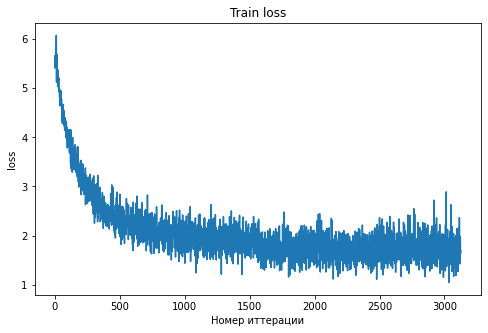

In [ ]:
torch.manual_seed(10)

plt.figure(figsize=(8,5))
plt.xlabel('Номер иттерации')
plt.ylabel('loss')
plt.title('Train loss')
# Сходимость градиента
plt.plot(np.arange(len(losses[0])), losses[0]);

Простой тест на проверку правильности написанного кода

In [ ]:
torch.manual_seed(10)

all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

Loss: 2.8788 Accuracy: 31.25: 100%|██████████| 157/157 [00:23<00:00,  6.81it/s]
tests passed


После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, запустите функцию evaluate. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [ ]:
torch.manual_seed(10)

all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(5, 5*accuracy / 0.44)))

Loss: 2.8788 Accuracy: 31.25: 100%|██████████| 157/157 [00:23<00:00,  6.80it/s]
Оценка за это задание составит 5 баллов


In [ ]:
# P.S. Accuracy в ячейке выше - это Accuracy на последней иттерации!! 
#Accuracy после эпохи:

torch.manual_seed(10)
accuracy_score(true_labels, predicted_labels)

0.5625

__Ваш отчёт о проделанных экспериментах__: 

1) Общие соображения относительно экспериментов

*Использование аугментаций*. Использование аугментаций действительно повышало accuracy уже после первой эпохи, однако, сильно замедляла время обучение (примерно в 1.5-2 раза). В своих экспериментах я пробовал разные комбинации ColorJitter, RandomHorizontalFlip, RandomRotation и использовал их композицию. В оставленном варианте решил отказаться от них, чтобы быстрее прогнать ноутбук, тк необходимая оценка всё равно достигается

*Размер батчей*. Пробовал разные размеры батчей - от 16 до 128 (поскольку датасет относительно большой, меньший размер создает высокие издержки времени). Для размеров 64-128 невозможно обучать большие модели (resnet101, resnet151, googlenet,...), поскольку объем памяти ограничен. В итоге для достижения оптимума Результат-Время выбрал 64.

*Использование больших моделей*. Из крупных моделей пробовал resnet151, googlenet, mobilenet. Но на данном датасете они иррелевантны - хоть мы и обучаем только полнойсвязный слой, проход forward занимает слишком много времени (к тому же ограничивает ресурсы - см. пункт размер батчей). При этом accuracy превышала результаты resnet18, однако модели обучались существенно дольше

*Выбор оптимайзера*. Выбирал из SGD Momentum и Adam - остановился на последнем, поскольку он быстро сходится на данном датасете.

*Использование scheduler*. Так как обучение почти всех использованных моделей проходило в интервале 10-20 минут, я отказался от использования этой функции, тк необходимое качество было получено за 15 минут, как и указано в условии задания (авторское решение).

2) Модели

*Resnet18*. Начал с неё, потому что подробно разбирали её на семинарах (семинар 5) и лекции. Обучал две эпохи:

* Время обучения: 10 минут

* Результат: Accuracy 1-ой эпохи (55%), Accuracy 2-ой эпохи (56%)

Для данного датасета одна из лучших моделей (не тестировал более простые по типу VGG16, Alexnet и тд)

*Resnet151*. Хотел посмотреть, что значит жёстко. Посмотрел.

* Время обучения: 30 минут

* Результат: Accuracy 1-ой эпохи (56%), Accuracy 2-ой эпохи (не дождался)

Об издержках использования сложных моделей отмечалось в первом разделе, тут же можно добавить, что было много проблем с памятью в CUDA - приходилось уменьшать размер батчей (т.к. google colab не мог хранить батчи по 64 для такой крупной сети)

*VGG16*. Ещё одна известная модель. К сожалению, обучение эпохи длилось около 30 минут, причем сходимость была куда хуже. Возможно это происходило из-за того, модель имеет несколько полносвязных слоев в конце - поэтому теряются важные закономерности при обучении только их.

## Часть 2. Object detection.

В этом задании потребуется обучить детектор фруктов на изображении. Датасет можно скачать [отсюда](https://yadi.sk/d/UPwQB7OZrB48qQ).

In [ ]:
# Основные библиотеки
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [ ]:
# we will need this library to process the labeling
! pip install xmltodict

In [ ]:
! pip install --upgrade albumentations

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 952kB 8.0MB/s 
     |████████████████████████████████| 36.7MB 87kB/s 
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import xmltodict, json

In [ ]:
# Основные библиотеки
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm

# Аугментации
import albumentations as A
from albumentations.pytorch.transforms import ToTensor

# Для класса датасет
import glob
import cv2
import os

# Метрика качества
from sklearn.metrics import auc

# Для работы с изображениями
from PIL import Image
from PIL import ImageDraw

# Импортируем модели
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
! wget https://www.dropbox.com/s/m41to1o962hdfa7/archive.zip
! unzip -q archive.zip 

--2020-11-23 19:17:04--  https://www.dropbox.com/s/m41to1o962hdfa7/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/m41to1o962hdfa7/archive.zip [following]
--2020-11-23 19:17:05--  https://www.dropbox.com/s/raw/m41to1o962hdfa7/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb11f2b23dc4341541a4c089ee9.dl.dropboxusercontent.com/cd/0/inline/BDxmD3tpBCbs2h_kFdbvNjGqes-2vuK2sWY0Uh4DEPK5ZNHYXN11SNR0in5mdLPwUFDm_PO3PID9QcqDaBoskunTl6KV4_oqV6BvOyBQp8lGHonzkiV5VFEiM3arG6CugQI/file# [following]
--2020-11-23 19:17:05--  https://ucb11f2b23dc4341541a4c089ee9.dl.dropboxusercontent.com/cd/0/inline/BDxmD3tpBCbs2h_kFdbvNjGqes-2vuK2sWY0Uh4DEPK5ZNHYXN11SNR0in5mdLPwUFDm_PO3PID9QcqDaBoskunTl6KV4_oqV6BvOyBQp8lGHonzki

Датасет мы за вас написали.

In [ ]:
class2tag = {"apple": 1, "orange": 2, "banana": 3}


class FruitDataset(Dataset):
    def __init__(self, data_dir, transform):
        self.images = []
        self.annotations = []
        self.transform = transform
        for annotation in glob.glob(data_dir + "/*xml"):
            image_fname = os.path.splitext(annotation)[0] + ".jpg"
            self.images.append(cv2.cvtColor(cv2.imread(image_fname), cv2.COLOR_BGR2RGB))
            with open(annotation) as f:
                annotation_dict = xmltodict.parse(f.read())
            bboxes = []
            labels = []
            objects = annotation_dict["annotation"]["object"]
            if not isinstance(objects, list):
                objects = [objects]
            for obj in objects:
                bndbox = obj["bndbox"]
                bbox = [bndbox["xmin"], bndbox["ymin"], bndbox["xmax"], bndbox["ymax"]]
                bbox = list(map(int, bbox))
                bboxes.append(torch.tensor(bbox))
                labels.append(class2tag[obj["name"]])
            self.annotations.append(
                {"boxes": torch.stack(bboxes).float(), "labels": torch.tensor(labels)}
            )

    def __getitem__(self, i):
        if self.transform:
            # the following code is correct if you use albumentations
            # if you use torchvision transforms you have to modify it =)
            res = self.transform(
                image=self.images[i],
                bboxes=self.annotations[i]["boxes"],
                labels=self.annotations[i]["labels"],
            )
            return res["image"], {
                "boxes": torch.tensor(res["bboxes"]),
                "labels": torch.tensor(res["labels"]),
            }
        else:
            return self.images[i], self.annotations[i]

    def __len__(self):
        return len(self.images)

Выпишем кое-какую техническую работу, которая уже была на семинаре.

In [ ]:
def intersection_over_union(dt_bbox, gt_bbox):
    """
    Intersection over Union between two bboxes
    :param dt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :param gt_bbox: list or numpy array of size (4,) [x0, y0, x1, y1]
    :return : intersection over union
    """

    ## TODO YOUR CODE

    intersection_bbox = np.array(
        [
            max(dt_bbox[0], gt_bbox[0]),
            max(dt_bbox[1], gt_bbox[1]),
            min(dt_bbox[2], gt_bbox[2]),
            min(dt_bbox[3], gt_bbox[3]),
        ]
    )

    intersection_area = max(intersection_bbox[2] - intersection_bbox[0], 0) * max(
        intersection_bbox[3] - intersection_bbox[1], 0
    )
    area_dt = (dt_bbox[2] - dt_bbox[0]) * (dt_bbox[3] - dt_bbox[1])
    area_gt = (gt_bbox[2] - gt_bbox[0]) * (gt_bbox[3] - gt_bbox[1])

    union_area = area_dt + area_gt - intersection_area

    iou = intersection_area / union_area
    return iou

def evaluate_sample(target_pred, target_true, iou_threshold=0.5):
    gt_bboxes = target_true["boxes"].numpy()
    gt_labels = target_true["labels"].numpy()

    dt_bboxes = target_pred["boxes"].numpy()
    dt_labels = target_pred["labels"].numpy()
    dt_scores = target_pred["scores"].numpy()

    results = []
    for detection_id in range(len(dt_labels)):
        dt_bbox = dt_bboxes[detection_id, :]
        dt_label = dt_labels[detection_id]
        dt_score = dt_scores[detection_id]

        detection_result_dict = {"score": dt_score}

        max_IoU = 0
        max_gt_id = -1
        for gt_id in range(len(gt_labels)):
            gt_bbox = gt_bboxes[gt_id, :]
            gt_label = gt_labels[gt_id]

            if gt_label != dt_label:
                continue

            if intersection_over_union(dt_bbox, gt_bbox) > max_IoU:
                max_IoU = intersection_over_union(dt_bbox, gt_bbox)
                max_gt_id = gt_id

        if max_gt_id >= 0 and max_IoU >= iou_threshold:
            detection_result_dict["TP"] = 1
            gt_labels = np.delete(gt_labels, max_gt_id, axis=0)
            gt_bboxes = np.delete(gt_bboxes, max_gt_id, axis=0)

        else:
            detection_result_dict["TP"] = 0

        results.append(detection_result_dict)

    return results


def evaluate(model, test_loader, device):
    results = []
    model.eval()
    nbr_boxes = 0
    with torch.no_grad():
        for batch, (images, targets_true) in enumerate(test_loader):
            images = list(image.to(device).float() for image in images)
            targets_pred = model(images)
            targets_true = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_true
            ]
            targets_pred = [
                {k: v.cpu().float() for k, v in t.items()} for t in targets_pred
            ]

            for i in range(len(targets_true)):
                target_true = targets_true[i]
                target_pred = targets_pred[i]
                nbr_boxes += target_true["labels"].shape[0]

                results.extend(evaluate_sample(target_pred, target_true))

    results = sorted(results, key=lambda k: k["score"], reverse=True)

    acc_TP = np.zeros(len(results))
    acc_FP = np.zeros(len(results))
    recall = np.zeros(len(results))
    precision = np.zeros(len(results))

    if results[0]["TP"] == 1:
        acc_TP[0] = 1
    else:
        acc_FP[0] = 1

    for i in range(1, len(results)):
        acc_TP[i] = results[i]["TP"] + acc_TP[i - 1]
        acc_FP[i] = (1 - results[i]["TP"]) + acc_FP[i - 1]

        precision[i] = acc_TP[i] / (acc_TP[i] + acc_FP[i])
        recall[i] = acc_TP[i] / nbr_boxes

    return auc(recall, precision)

Вам мы оставляем творческую часть =)

__Задание__. Обучите модель для object detection на __обучающем__ датасете и добейтесь PR-AUC не менее __0.91__ на  __тестовом__.

 - Создайте модель и оптимайзер
 - Напишите функцию обучения модели
 - Используйте аугментации
 
Использовать аугментации для обучения __обязательно__. Они дадут 1 балл из 5. Пользуйтесь модулем torchvision.transforms или библиотекой albumentations (о которой говорилось ранее). Последняя библиотека особенно удобна, поскольку умеет сама вычислять новые координаты bounding box'ов после трансформаций картинки. Советуем обратить внимание на следующий [гайд](https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/). Обратите внимание, что код, написанный в датасете выше, верен только если вы используете albumentations. Если вы выбрали путь torchvision.transforms, вам потребуется метод `__getitem__` изменить (что-то типа `return self.transform(self.images[i])`; однако в таком случае вычислять новые координаты bounding box'ов после трансформаций вам придётся вручную =))

Оставшиеся 4 балла вычисляются по простой формуле: __min(4, 4 * Ваш auc / 0.91)__.

In [ ]:
def train_one_epoch(model, train_dataloader, optimizer, device):
    model.train()
    n = 0
    global_loss = 0
    with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
      for images, targets in train_dataloader:
        images = list(image.to(device).float() for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        dict_loss = model(images, targets)
        losses = sum(loss for loss in dict_loss.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        n += 1
        global_loss += float(losses.cpu().detach().numpy())
        prbar.set_description(f"Loss: {round(global_loss / n, 2)} ")
        prbar.update(1)

    return global_loss


def train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs=10):
    for epoch in range(n_epochs):
        print(f"Epoch: {epoch+1}")
        model.train()
        train_one_epoch(model, train_dataloader, optimizer, device=device)
        model.eval()
        a = evaluate(model, val_dataloader, device=device)
        print("AUC on test:", a)

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
def get_transform(transforms): # Функция для присваивания аугментаций

    return A.Compose(transforms, bbox_params=A.BboxParams(format='pascal_voc', label_fields=['labels']))

In [ ]:
# Выбор аугментаций
train_transform = [A.HorizontalFlip(0.5), A.RandomBrightnessContrast(p=0.2), ToTensor()]
val_transform = [ToTensor()]

# Получение датасетов
dataset_train = FruitDataset('./archive/train_zip/train', transform=get_transform(train_transform))
dataset_test = FruitDataset('./archive/test_zip/test', transform=get_transform(val_transform))

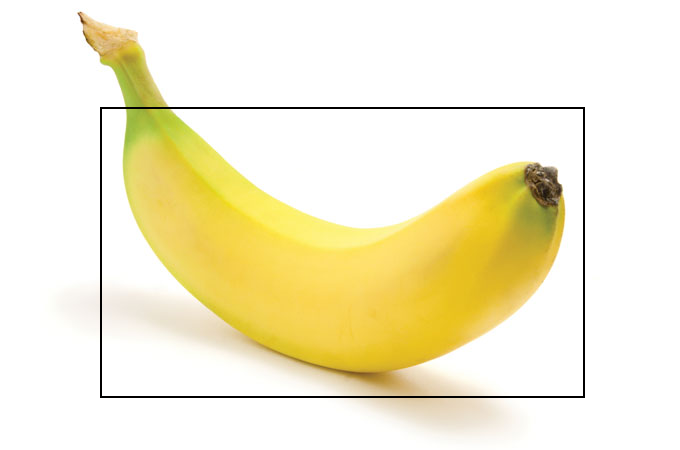

In [ ]:
image, labels = next(iter(dataset_train))

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)

for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline=1, width=2)
image

# Датасет загрузился, пример картинки: 

In [ ]:
def get_detection_model(num_classes=3): # Удобная функция из семинара 7 для присвоения модели

    model = fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [ ]:
torch.manual_seed(10)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
num_classes = 4 

# Модель и её параметры
model = get_detection_model(num_classes)
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]

# Оптимайзер и даталоадеры
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9)
train_dataloader = torch.utils.data.DataLoader(
    dataset_train, batch_size=2, shuffle=True, num_workers=4, collate_fn=collate_fn)
val_dataloader = torch.utils.data.DataLoader(
    dataset_test, batch_size=2, shuffle=False, num_workers=4, collate_fn=collate_fn)
n_epochs = 10

train(model, train_dataloader, val_dataloader, optimizer, device, n_epochs)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth



Epoch: 1
Loss: 0.34 : 100%|██████████| 120/120 [00:43<00:00,  2.76it/s]
AUC on test: 0.8758059558383942
Epoch: 2
Loss: 0.19 : 100%|██████████| 120/120 [00:43<00:00,  2.79it/s]
AUC on test: 0.8955518898123067
Epoch: 3
Loss: 0.16 : 100%|██████████| 120/120 [00:43<00:00,  2.78it/s]
AUC on test: 0.7910674274010733
Epoch: 4
Loss: 0.13 : 100%|██████████| 120/120 [00:43<00:00,  2.77it/s]
AUC on test: 0.9018594310167378
Epoch: 5
Loss: 0.12 : 100%|██████████| 120/120 [00:43<00:00,  2.76it/s]
AUC on test: 0.9183199298436124
Epoch: 6
Loss: 0.1 : 100%|██████████| 120/120 [00:43<00:00,  2.79it/s]
AUC on test: 0.9266788210030594
Epoch: 7
Loss: 0.09 : 100%|██████████| 120/120 [00:43<00:00,  2.76it/s]
AUC on test: 0.9462759785876164
Epoch: 8
Loss: 0.09 : 100%|██████████| 120/120 [00:43<00:00,  2.76it/s]
AUC on test: 0.9394679085462306
Epoch: 9
Loss: 0.08 : 100%|██████████| 120/120 [00:43<00:00,  2.76it/s]
AUC on test: 0.9082682271041369
Epoch: 10
Loss: 0.08 : 100%|██████████| 120/120 [00:42<00:00,  2

__Выведите итоговое качество модели__.

In [ ]:
auc = evaluate(model, val_dataloader, device)
print("Оценка за это задание составит {} баллов".format(min(4, 4 * auc / 0.91)))

Оценка за это задание составит 4 баллов


Нарисуйте предсказанные bounding box'ы для любых двух картинок из __тестового__ датасета.

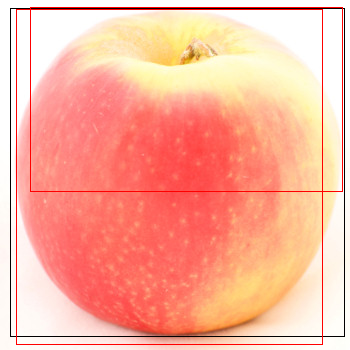

In [ ]:
torch.manual_seed(10)

image, labels = dataset_test[9]
pred = model(image.unsqueeze(0).to(device))[0]

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline=1)
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

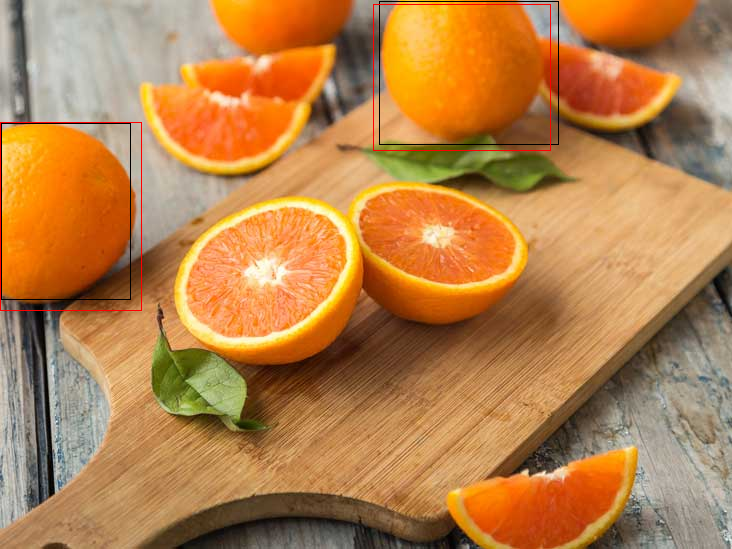

In [ ]:
torch.manual_seed(10)
image, labels = dataset_test[11]
pred = model(image.unsqueeze(0).to(device))[0]

image = torchvision.transforms.ToPILImage()(image)
draw = ImageDraw.Draw(image)
for box in labels['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline=1)
    
for box in pred['boxes']:
    draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red')
image

## Бонус (10 баллов).

__Задание__. В части с классификацией добейтесь accuracy не менее 0.52. Напишите отчёт о проделанных экспериментах.

__Критерии оценки__. Оценка за бонусную часть равна 10, если вы преодолели качество 0.52 и 0 в противном случае.

__Иных оценок кроме 0 и 10 не предусмотрено__.

In [ ]:
# Бонус написан в первом задании

## Бонус (0 баллов).

__Задание 1__. Скиньте ниже смешную картинку, желательно про машинное обучение. На картинке не должно быть никаких упоминаний лектора, семинаристов и ассистентов этого курса.




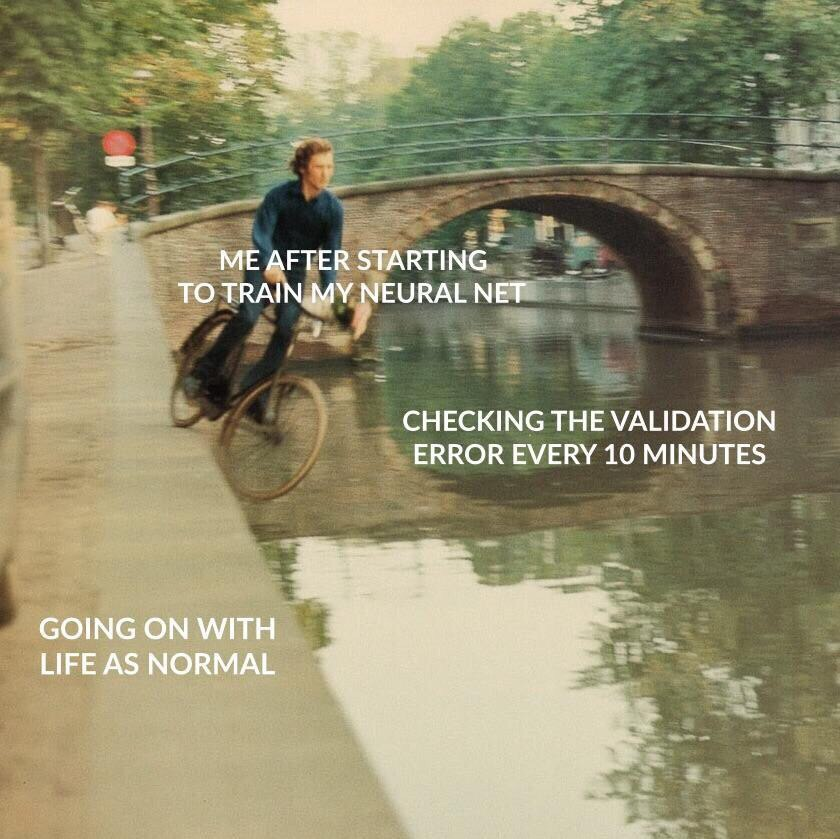

__Задание 2__. Расскажите, как вам задание? Что понравилось, что не понравилось, что можно улучшить? Мы примем во внимание любой фидбек.

Буду сравнивать относительно прошлого ДЗ:

* Очень понравилась идея решения задачи "с нуля": Сначала скачать данные, потом написать свой датасет, даталоадеры, функции train/val и подобрать параметры. Это очень приближает формат реальной задачи/соревнования. 

* Очень нравится, что функции train/val и некоторые другие части ДЗ написаны за нас, а творческая часть - подбор архитектуры, аугментаций, оптимайзера и гиперпараметров отдается студентам. Это экономит время и силы, распределяя время на более полезную часть, а не поиск случайных ошибок в вышеперечисленных функциях.

* Понравился сам формат: всё таки создание своих архитектур (как это было во второй части ДЗ1) - это, хоть и является процессом творческим и интересным, для студентов майнора может быть слишком непонятным: по сути для нас нейронная сеть - чёрный ящик, и мы подбираем архитектуры просто смотря на итоговое качество, не отвечая на вопрос "а почему это так", "а почему это работает". 

В ДЗ2 же нам прямо предложили использовать готовые архитектуры, что как мне кажется более полезно с прикладной точки зрения - больше относится к решению прикладных задач, на что и нацелен майнор.







